In [29]:
# -*- coding: UTF-8 -*-
import math
import matplotlib.pyplot as plt 

In [30]:
def sigmoid(a):
    ###シグモイド関数
    ###
    return 1.0 / (1.0 + math.exp(-a))

In [47]:
class Neuron:
    ### 単一ニューロンクラス
    ###
    
    input_sum = 0.0
    output = 0.0
    
    def setInput(self, inp):
        self.input_sum += inp
        
    def getOutput(self):
        self.output = sigmoid(self.input_sum)
        return self.output
    
    def reset(self):
        self.input_sum = 0
        self.output = 0

In [54]:
class NeuralNetwork:
    ### ニューラルネットワーククラス
    
    ###
    
    # 入力の重み
    weights = [-0.5, 0.5]
    
    # ニューロンのインスタンス化
    neuron = Neuron()
    
    # 実行
    def commit(self, input_data):
        if len(input_data) == len(self.weights):
            for data,weight in zip(input_data,self.weights):
                self.neuron.setInput(data * weight)
        else:
            print("the number of input_data and weights is not same")
        return self.neuron.getOutput()

In [55]:
# 基準値(データの範囲を0.0-1.0の範囲に収めるため)
refer_point_0 = 34.5
refer_point_1 = 137.5

In [56]:
# ファイルの読み込み
trial_data = []
trial_data_file = open("trial_data","r")
for line in trial_data_file:
    line = line.rstrip().split(",")
    trial_data.append([float(line[0]) - refer_point_0, float(line[1]) - refer_point_1])
trial_data_file.close()

In [57]:
# ニューラルネットワークのインスタンス化
neural_network = NeuralNetwork()

In [58]:
# 実行
position_tokyo = [[], []]
position_kanagawa = [[], []]
for data in trial_data:
    if neural_network.commit(data) < 0.5:
        position_tokyo[0].append(data[1] + refer_point_1)
        position_tokyo[1].append(data[0] + refer_point_0)
    else:
        position_kanagawa[0].append(data[1] + refer_point_1)
        position_kanagawa[1].append(data[0] + refer_point_0)

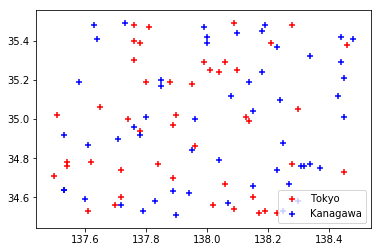

In [59]:
# プロット
plt.scatter(position_tokyo[0], position_tokyo[1], c="red", label= "Tokyo", marker= "+")
plt.scatter(position_kanagawa[0], position_kanagawa[1], c="blue", label= "Kanagawa", marker= "+")
plt.legend()
plt.show()